<a href="https://colab.research.google.com/github/SamaherHaji/E-commerce-Customer-Segmentation-/blob/main/E_commerce_Customer_Segmentation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#dataframe and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data
customers = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/E-commerce_data.xlsx", sheet_name='customers')
transactions = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/E-commerce_data.xlsx", sheet_name='transactions')
cities = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/E-commerce_data.xlsx", sheet_name='cities')
genders = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/E-commerce_data.xlsx", sheet_name='genders')

In [ ]:
# Display the first few rows
customers.head()

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1


In [ ]:
# Display the first few rows
transactions.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6


In [ ]:
# Display the first few rows
cities.head()

,city_id,city_name
0,1,Cairo
1,2,Alexandria
2,3,Giza
3,4,Shubra El-Kheima
4,5,Port Said


In [ ]:
#view the data types of each table
print(customers.dtypes)
print("\n",transactions.dtypes)
print("\n",cities.dtypes)
print("\n", genders.dtypes)


customer_id             int64
join_date      datetime64[ns]
city_id                 int64
gender_id               int64
dtype: object

 transaction_id                 int64
customer_id                    int64
transaction_date      datetime64[ns]
transaction_status            object
coupon_name                   object
burn_date             datetime64[ns]
branch_id                      int64
dtype: object

 city_id       int64
city_name    object
dtype: object

 gender_id       int64
gender_name    object
dtype: object


In [ ]:
# Display the shape of each table
print("Customers Table:")
print(customers.shape)

print("\nTransactions Table:")
print(transactions.shape)

print("\nCitiesTable:")
print(cities.shape)

print("\nCitiesTable:")
print(genders.shape)

Customers Table:
(1000, 4)

Transactions Table:
(5000, 7)

CitiesTable:
(20, 2)

CitiesTable:
(2, 2)


In [ ]:
# Merge customers with cities and genders
customers = pd.merge(customers, cities, on='city_id')
customers = pd.merge(customers, genders, on='gender_id')

# Merge transactions with customers
data = pd.merge(transactions, customers, on='customer_id')
data.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,city_name,gender_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Aswan,Female
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Damietta,Female
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Alexandria,Male
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Aswan,Female
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Damietta,Male


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()* 100 / len(data)


,0
transaction_id,0.00
customer_id,0.00
transaction_date,0.00
transaction_status,0.00
coupon_name,0.00
burn_date,49.68
branch_id,0.00
join_date,0.00
city_id,0.00
gender_id,0.00


**Feature Engineering**

In [ ]:
# Calculate coupon usage frequency
usage_frequency = data.groupby('customer_id')['transaction_id'].count().reset_index()
usage_frequency.columns = ['customer_id', 'usage_frequency']

In [ ]:
# Calculate the number of burned and subscribed transactions per customer
burned_count = data[data['transaction_status'] == 'burned'].groupby('customer_id')['transaction_id'].count().reset_index()
burned_count.columns = ['customer_id', 'burned_count']

subscribed_count = data[data['transaction_status'] == 'subscribed'].groupby('customer_id')['transaction_id'].count().reset_index()
subscribed_count.columns = ['customer_id', 'subscribed_count']


In [ ]:
# Merge all features into one dataframe
features = pd.merge(usage_frequency, burned_count, on='customer_id', how='left')
features = pd.merge(features, subscribed_count, on='customer_id', how='left')

In [ ]:
#The ratio of burned coupons to total coupons claimed.
#features['burn_rate'] = features['burned_count'] / features['usage_frequency']

In [ ]:
#Average Time Between Transactions
#data['transaction_date'] = pd.to_datetime(data['transaction_date'])
#data = data.sort_values(by=['customer_id', 'transaction_date'])
#data['time_between_transactions'] = data.groupby('customer_id')['transaction_date'].diff().dt.days
#avg_time_between_transactions = data.groupby('customer_id')['time_between_transactions'].mean().reset_index()
#features = pd.merge(features, avg_time_between_transactions, on='customer_id')


In [ ]:
# Fill NaN values with 0 (in case some customers have no burned or subscribed transactions)
features = features.fillna(0)


In [ ]:
# Check the column names after one-hot encoding
print(data.columns)

Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id',
       'join_date', 'city_id', 'gender_id', 'city_name', 'gender_name'],
      dtype='object')


In [ ]:
# One-hot encode categorical features
data = pd.get_dummies(data, columns=['city_name', 'gender_name'], drop_first=True)

# Check the column names again
print(data.columns)

Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id',
       'join_date', 'city_id', 'gender_id', 'city_name_Aswan',
       'city_name_Asyut', 'city_name_Beni Suef', 'city_name_Cairo',
       'city_name_Damanhur', 'city_name_Damietta',
       'city_name_El-Mahalla El-Kubra', 'city_name_Fayyum', 'city_name_Giza',
       'city_name_Ismailia', 'city_name_Mansoura', 'city_name_Minya',
       'city_name_Port Said', 'city_name_Qena', 'city_name_Shubra El-Kheima',
       'city_name_Sohag', 'city_name_Suez', 'city_name_Tanta',
       'city_name_Zagazig', 'gender_name_Male'],
      dtype='object')


In [ ]:
# Step 2: Check the Column Names
print("Columns after one-hot encoding:")
print(data.columns)

# Step 3: Aggregate Demographic Features
# Replace 'city_name_Cairo' and 'gender_name_Female' with the correct column names
demographic_features = data.groupby('customer_id')[['city_name_Cairo', 'gender_name_Male']].mean().reset_index()

# Step 4: Merge Demographic Features with Behavioral Features
features = pd.merge(features, demographic_features, on='customer_id')

# Display the updated features dataframe
print(features.head())

Columns after one-hot encoding:
Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id',
       'join_date', 'city_id', 'gender_id', 'city_name_Aswan',
       'city_name_Asyut', 'city_name_Beni Suef', 'city_name_Cairo',
       'city_name_Damanhur', 'city_name_Damietta',
       'city_name_El-Mahalla El-Kubra', 'city_name_Fayyum', 'city_name_Giza',
       'city_name_Ismailia', 'city_name_Mansoura', 'city_name_Minya',
       'city_name_Port Said', 'city_name_Qena', 'city_name_Shubra El-Kheima',
       'city_name_Sohag', 'city_name_Suez', 'city_name_Tanta',
       'city_name_Zagazig', 'gender_name_Male'],
      dtype='object')
   customer_id  usage_frequency  burned_count  subscribed_count  \
0            1                7           3.0               4.0   
1            2                3           1.0               2.0   
2            3                5           1.0               4.0   
3            4              

In [ ]:
print(data.columns)


Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id',
       'join_date', 'city_id', 'gender_id', 'city_name_Aswan',
       'city_name_Asyut', 'city_name_Beni Suef', 'city_name_Cairo',
       'city_name_Damanhur', 'city_name_Damietta',
       'city_name_El-Mahalla El-Kubra', 'city_name_Fayyum', 'city_name_Giza',
       'city_name_Ismailia', 'city_name_Mansoura', 'city_name_Minya',
       'city_name_Port Said', 'city_name_Qena', 'city_name_Shubra El-Kheima',
       'city_name_Sohag', 'city_name_Suez', 'city_name_Tanta',
       'city_name_Zagazig', 'gender_name_Male'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop('customer_id', axis=1))

# Convert scaled features back to a dataframe
scaled_features = pd.DataFrame(scaled_features, columns=features.columns[1:])

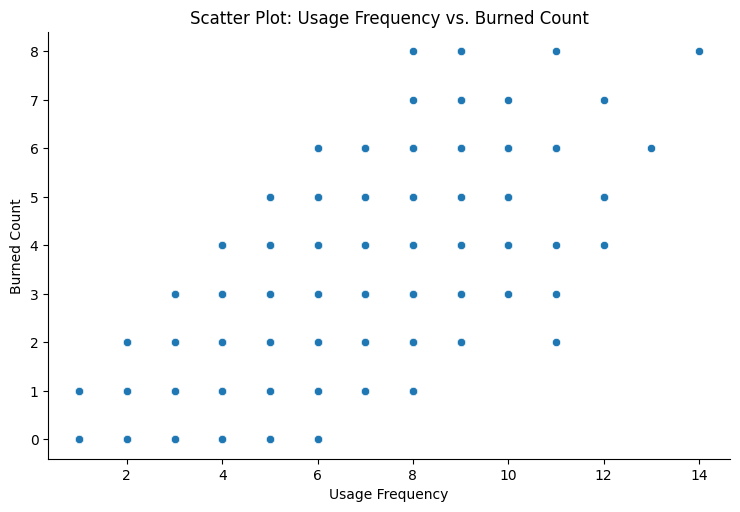

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of usage_frequency vs. burned_count
sns.relplot(
    x='usage_frequency',
    y='burned_count',
    data=features,
    kind='scatter',
    height=5,
    aspect=1.5
)
plt.title('Scatter Plot: Usage Frequency vs. Burned Count')
plt.xlabel('Usage Frequency')
plt.ylabel('Burned Count')
plt.show()

**process the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop('customer_id', axis=1))

# Convert scaled features back to a dataframe
scaled_features = pd.DataFrame(scaled_features, columns=features.columns[1:])

Explore a Number of different Clusters

In [ ]:
# Initialize lists to store SSE and Silhouette Scores
sse = []
silhouette_scores = []

# Define the range of clusters to explore
cluster_range = range(2, 11)  # Test from 2 to 10 clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# Loop through different numbers of clusters
for k in cluster_range:
    # Train the K-Means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)

    # Append SSE to the list
    sse.append(kmeans.inertia_)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    # Print the Silhouette Score for each k
    print(f"For n_clusters = {k}, the Silhouette Score is {silhouette_avg:.2f}")

For n_clusters = 2, the Silhouette Score is 0.28
For n_clusters = 3, the Silhouette Score is 0.32
For n_clusters = 4, the Silhouette Score is 0.35
For n_clusters = 5, the Silhouette Score is 0.34
For n_clusters = 6, the Silhouette Score is 0.35
For n_clusters = 7, the Silhouette Score is 0.36
For n_clusters = 8, the Silhouette Score is 0.35
For n_clusters = 9, the Silhouette Score is 0.36
For n_clusters = 10, the Silhouette Score is 0.36


Text(0.5, 1.0, 'Elbow Method')

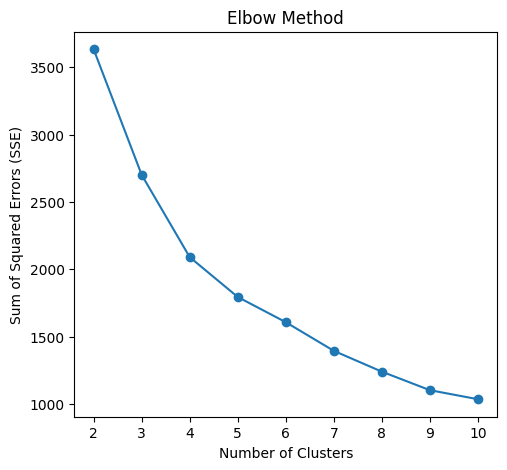

In [ ]:
# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Plot SSE
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')


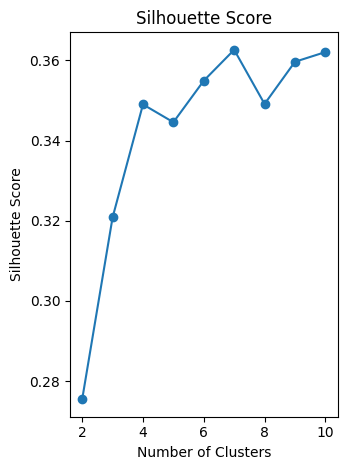

In [ ]:
# Silhouette Scores Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
#Train the Final Model with the Optimal Number of Clusters
# Choose the optimal number of clusters based on the plots
optimal_k = 7  # Replace with your chosen k (e.g., 3 or 4)

# Train the final K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the features dataframe
features['cluster'] = kmeans.labels_

In [ ]:
# Step 9: Analyze the Clusters
# Group by cluster and calculate mean values
cluster_summary = features.groupby('cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         customer_id  usage_frequency  burned_count  subscribed_count  \
cluster                                                                 
0         513.144928         8.521739      4.739130          3.782609   
1         470.524345         3.393258      1.640449          1.752809   
2         483.424242         5.106061      2.348485          2.757576   
3         499.067227         3.693277      2.378151          1.315126   
4         515.638095         7.952381      2.904762          5.047619   
5         508.866667         6.561905      4.571429          1.990476   
6         545.834532         5.510791      1.762590          3.748201   

         city_name_Cairo  gender_name_Male  
cluster                                     
0                    0.0          0.014493  
1                    0.0          1.000000  
2                    1.0          0.439394  
3                    0.0          0.000000  
4                    0.0          0.980952  
5         

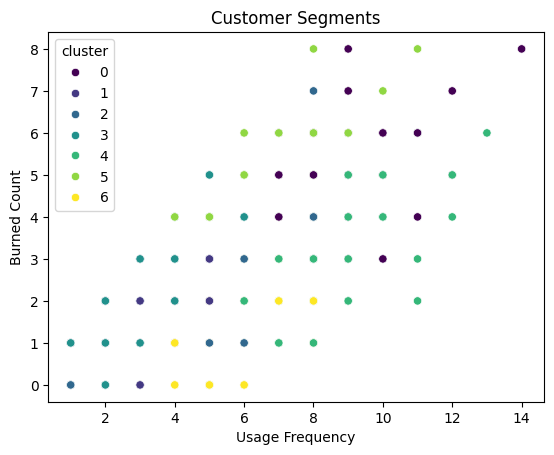

In [ ]:
# Step 10: Visualize the Clusters
# Scatter plot of usage frequency vs. burned count
sns.scatterplot(x='usage_frequency', y='burned_count', hue='cluster', data=features, palette='viridis')
plt.xlabel('Usage Frequency')
plt.ylabel('Burned Count')
plt.title('Customer Segments')
plt.show()

Cluster Summary (Hierarchical Clustering):
         customer_id  usage_frequency  burned_count  subscribed_count  \
cluster                                                                 
0             1000.0              2.0           1.0               1.0   
1              999.0              4.0           4.0               0.0   
2              995.0              3.0           2.0               1.0   
3              997.0              3.0           1.0               2.0   
4              998.0              4.0           3.0               1.0   
...              ...              ...           ...               ...   
984              5.0              4.0           3.0               1.0   
985              4.0              1.0           0.0               1.0   
986              3.0              5.0           1.0               4.0   
987              2.0              3.0           1.0               2.0   
988              1.0              7.0           3.0               4.0   

       

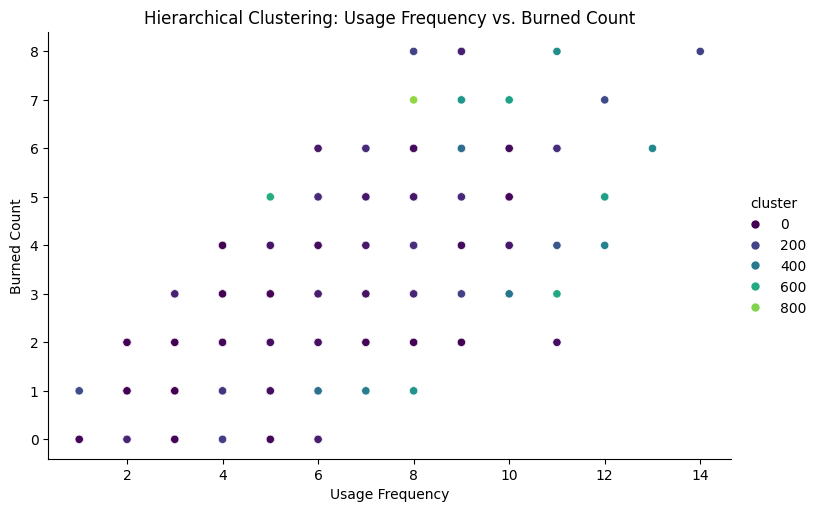

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create feature matrix
X = features.iloc[:, 1:5]


# Train the Hierarchical Clustering model
agglo = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
agglo_labels = agglo.fit_predict(scaled_features)

# Add cluster labels to the features dataframe
features['cluster'] = agglo_labels

# Analyze the clusters
cluster_summary = features.groupby('cluster').mean()
print("Cluster Summary (Hierarchical Clustering):")
print(cluster_summary)

# Visualize the clusters
sns.relplot(
    x='usage_frequency',
    y='burned_count',
    hue='cluster',
    data=features,
    kind='scatter',
    height=5,
    aspect=1.5,
    palette='viridis'
)
plt.title('Hierarchical Clustering: Usage Frequency vs. Burned Count')
plt.xlabel('Usage Frequency')
plt.ylabel('Burned Count')
plt.show()



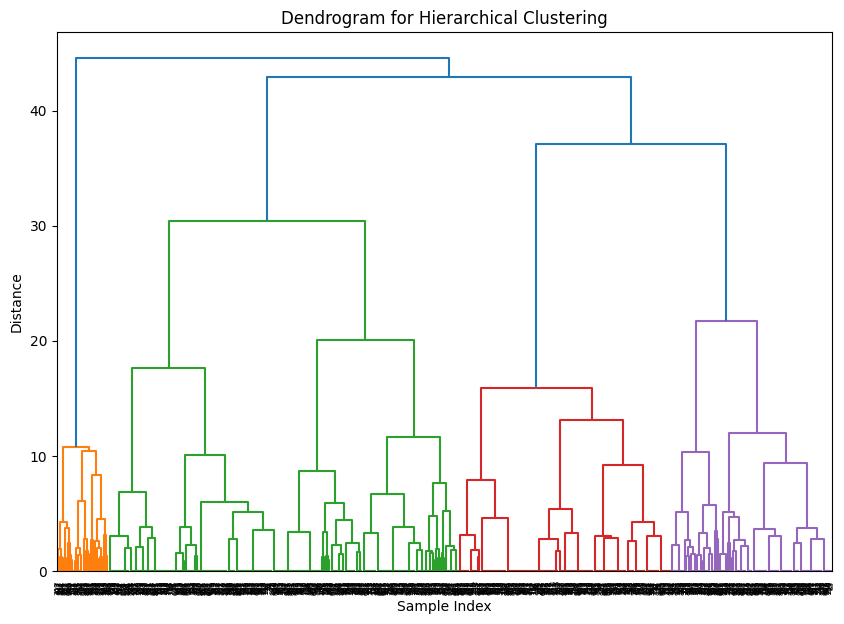

In [ ]:
# Plot the Dendrogram
# linkage matrix for
Z = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()